# The hope of this code is to be able to do fundemental physics with simple force plate data


## Fundemental Physics:


    - Momentum Principle
    
    
## Things to include:
    - graphs +
    - integration for a single jump +
    - some animation of the forces
    - "Normalizization" +
    - long jump, broad jump +
    
    -


In [13]:

import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd
from vpython import *

In [18]:
filename='AMTIdata.txt'
amtidata = loadtxt(filename, dtype = float, delimiter = '\t', skiprows = 0)
#df = pd.DataFrame(datafile)

In [37]:
headings = ['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']



df = pd.DataFrame(amtidata, columns = headings)

In [38]:
df

,Fx,Fy,Fz,Mx,My,Mz
0,10.47299,28.87462,-828.77137,105.24224,-24.68882,-1.67369
1,5.23650,20.38209,-824.68876,103.54479,-25.98823,2.78948
2,7.85475,33.97014,-832.85399,103.54479,-23.38941,-1.39474
3,5.23650,23.77910,-824.68876,103.54479,-25.98823,0.27895
4,6.98200,20.38209,-824.68876,103.54479,-25.98823,-4.18423
5,4.36375,21.23134,-824.68876,103.54479,-25.98823,-0.27895
6,0.00000,26.32686,-808.35828,106.93970,-23.38941,1.67369
7,16.58224,111.25222,-400.09652,118.82189,-29.88646,-0.83685
8,33.16448,-60.29700,134.72638,93.36005,-48.07822,6.69476
9,36.65548,-11.04030,857.34970,91.66260,-79.26410,9.20530


<Figure size 432x288 with 0 Axes>

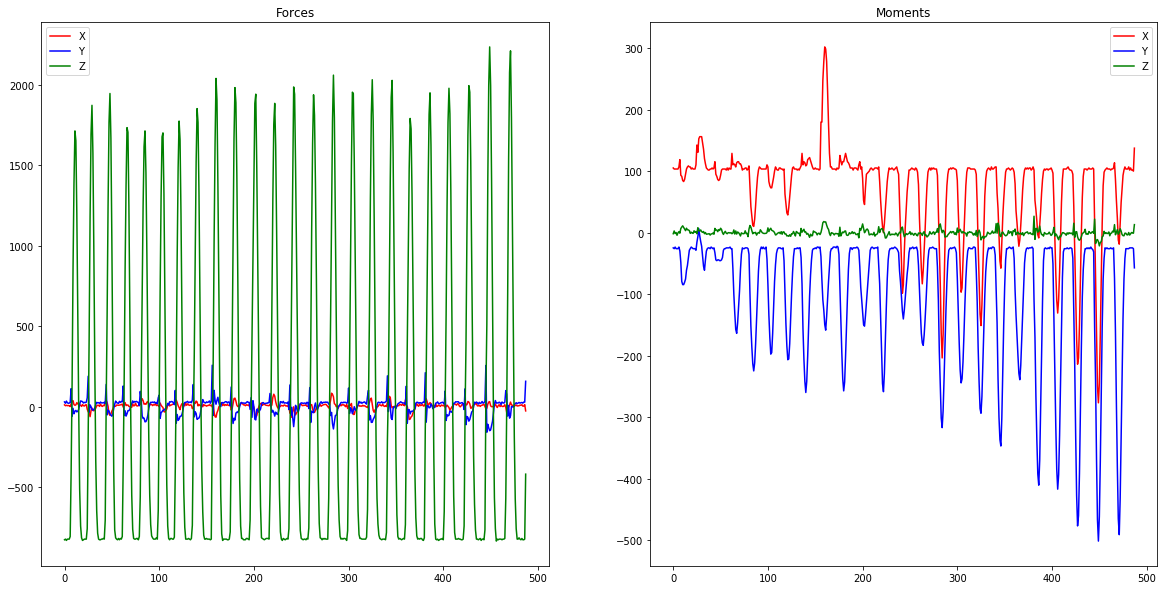

In [43]:
plt.figure()
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(df['Fx'], 'r', label = 'X')
plt.plot(df['Fy'], 'b', label = 'Y')
plt.plot(df['Fz'], 'g', label = 'Z')
plt.legend()
plt.title('Forces')


plt.subplot(1,2,2)
plt.plot(df['Mx'], 'r', label = 'X')
plt.plot(df['My'], 'b', label = 'Y')
plt.plot(df['Mz'], 'g', label = 'Z')
plt.legend()
plt.title('Moments')

#plt.tight_layout()
plt.legend()
plt.show()

In [33]:
weight = -df.min()
weight

Fx     80.29296
Fy    159.65967
Fz    836.93661
Mx    276.68525
My    501.57281
Mz     21.47903
dtype: float64